In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries and dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from collections import Counter
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [3]:
columns = ["Neiborhood", "Building Class Catagory", "Address", "Zip Code", "Residential Units", "Gross Square Feet", "Year Built", "Sale Date"]
Target = ["Sale Price"]

In [4]:
# Load the data
file_path = Path('NYC.csv')
NYC_df = pd.read_csv(file_path)
NYC_df.head()

Neighborhood                       Building Class Category  \
0  BATHGATE                   01  ONE FAMILY HOMES                           
1  BATHGATE                   01  ONE FAMILY HOMES                           
2  BATHGATE                   01  ONE FAMILY HOMES                           
3  BATHGATE                   01  ONE FAMILY HOMES                           
4  BATHGATE                   01  ONE FAMILY HOMES                           

                                     Address  Zip Code  Residential Units  \
0  1848 WASHINGTON AVENUE                        10457                  1   
1  412 EAST 179 STREET                           10457                  1   
2  410 EAST 182 STREET                           10457                  1   
3  461 EAST 178 STREET                           10457                  1   
4  2186 BATHGATE AVENUE                          10457                  1   

   Gross Square Feet  Year Built  Sale Price        Sale Date  
0               2128        1920      130000  2003-05-27 0:00  
1               2048        1901      204000  2003-04-07 0:00  
2               1460        1899      235000  2003-07-24 0:00  
3               1548        1899      215000  2003-05-14 0:00  
4               1188        1901      245000  2003-04-15 0:00

In [5]:
NYC_df.columns

Index(['Neighborhood', 'Building Class Category', 'Address', 'Zip Code',
       'Residential Units', 'Gross Square Feet', 'Year Built', 'Sale Price',
       'Sale Date'],
      dtype='object')

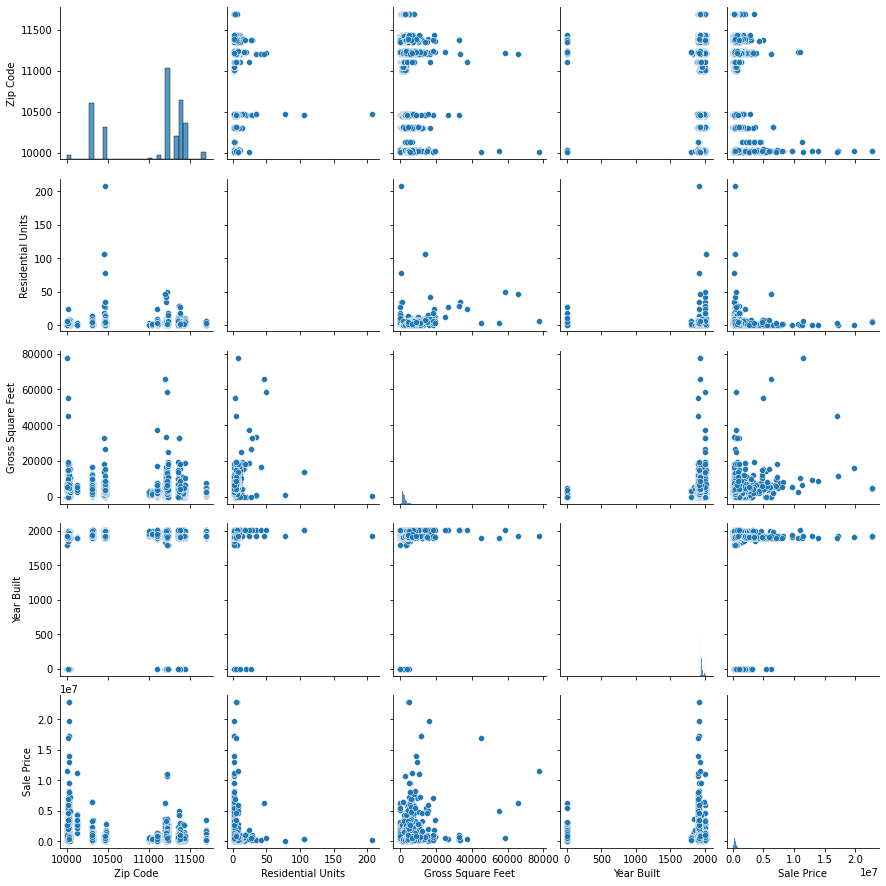

In [6]:
sns.pairplot(NYC_df)

In [7]:
NYC_df.hvplot.hist(by='Sale Price', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Year Built]   (Year Built_count)

In [8]:
NYC_df.hvplot.hist("Sale Price")

:Histogram   [Sale Price]   (Sale Price_count)

In [9]:
NYC_df.hvplot.scatter(x='Gross Square Feet', y='Sale Price')

:Scatter   [Gross Square Feet]   (Sale Price)

<AxesSubplot:>

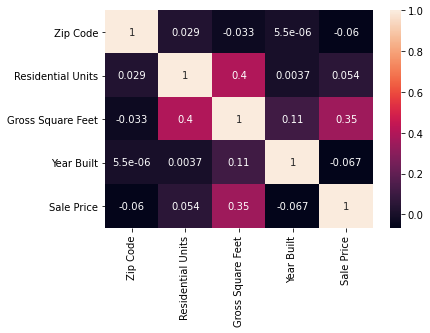

In [10]:
sns.heatmap(NYC_df.corr(), annot=True)

In [11]:
NYC_df["Sale Date"] = pd.to_datetime(NYC_df["Sale Date"], errors='coerce')
NYC_df.head()

Neighborhood                       Building Class Category  \
0  BATHGATE                   01  ONE FAMILY HOMES                           
1  BATHGATE                   01  ONE FAMILY HOMES                           
2  BATHGATE                   01  ONE FAMILY HOMES                           
3  BATHGATE                   01  ONE FAMILY HOMES                           
4  BATHGATE                   01  ONE FAMILY HOMES                           

                                     Address  Zip Code  Residential Units  \
0  1848 WASHINGTON AVENUE                        10457                  1   
1  412 EAST 179 STREET                           10457                  1   
2  410 EAST 182 STREET                           10457                  1   
3  461 EAST 178 STREET                           10457                  1   
4  2186 BATHGATE AVENUE                          10457                  1   

   Gross Square Feet  Year Built  Sale Price  Sale Date  
0               2128        1920      130000 2003-05-27  
1               2048        1901      204000 2003-04-07  
2               1460        1899      235000 2003-07-24  
3               1548        1899      215000 2003-05-14  
4               1188        1901      245000 2003-04-15

In [12]:
NYC_df["Sale_Date"] = NYC_df["Sale Date"].dt.strftime("%Y%m")
NYC_df.head()

Neighborhood                       Building Class Category  \
0  BATHGATE                   01  ONE FAMILY HOMES                           
1  BATHGATE                   01  ONE FAMILY HOMES                           
2  BATHGATE                   01  ONE FAMILY HOMES                           
3  BATHGATE                   01  ONE FAMILY HOMES                           
4  BATHGATE                   01  ONE FAMILY HOMES                           

                                     Address  Zip Code  Residential Units  \
0  1848 WASHINGTON AVENUE                        10457                  1   
1  412 EAST 179 STREET                           10457                  1   
2  410 EAST 182 STREET                           10457                  1   
3  461 EAST 178 STREET                           10457                  1   
4  2186 BATHGATE AVENUE                          10457                  1   

   Gross Square Feet  Year Built  Sale Price  Sale Date Sale_Date  
0               2128        1920      130000 2003-05-27    200305  
1               2048        1901      204000 2003-04-07    200304  
2               1460        1899      235000 2003-07-24    200307  
3               1548        1899      215000 2003-05-14    200305  
4               1188        1901      245000 2003-04-15    200304

In [13]:
NYC_df.rename(columns = {"Gross Square Feet": "Gross_Square_Feet"}, inplace=True)
NYC_df.rename( columns = {"Sale Price": "Sale_Price"}, inplace=True)
NYC_df.head()

Neighborhood                       Building Class Category  \
0  BATHGATE                   01  ONE FAMILY HOMES                           
1  BATHGATE                   01  ONE FAMILY HOMES                           
2  BATHGATE                   01  ONE FAMILY HOMES                           
3  BATHGATE                   01  ONE FAMILY HOMES                           
4  BATHGATE                   01  ONE FAMILY HOMES                           

                                     Address  Zip Code  Residential Units  \
0  1848 WASHINGTON AVENUE                        10457                  1   
1  412 EAST 179 STREET                           10457                  1   
2  410 EAST 182 STREET                           10457                  1   
3  461 EAST 178 STREET                           10457                  1   
4  2186 BATHGATE AVENUE                          10457                  1   

   Gross_Square_Feet  Year Built  Sale_Price  Sale Date Sale_Date  
0               2128        1920      130000 2003-05-27    200305  
1               2048        1901      204000 2003-04-07    200304  
2               1460        1899      235000 2003-07-24    200307  
3               1548        1899      215000 2003-05-14    200305  
4               1188        1901      245000 2003-04-15    200304

In [14]:
NYC_df.Neighborhood.unique()

array(['BATHGATE                 ', 'BAYCHESTER               ',
       'BEDFORD PARK/NORWOOD     ', 'BELMONT                  ',
       'BRONX PARK               ', 'BRONXDALE                ',
       'CASTLE HILL/UNIONPORT    ', 'CITY ISLAND              ',
       'CO-OP CITY               ', 'COUNTRY CLUB             ',
       'CROTONA PARK             ', 'EAST TREMONT             ',
       'FIELDSTON                ', 'FORDHAM                  ',
       'HIGHBRIDGE/MORRIS HEIGHTS', 'HUNTS POINT              ',
       'KINGSBRIDGE HTS/UNIV HTS ', 'KINGSBRIDGE/JEROME PARK  ',
       'MELROSE/CONCOURSE        ', 'MORRIS PARK/VAN NEST     ',
       'MORRISANIA/LONGWOOD      ', 'MOTT HAVEN/PORT MORRIS   ',
       'MOUNT HOPE/MOUNT EDEN    ', 'PARKCHESTER              ',
       'PELHAM GARDENS           ', 'PELHAM PARKWAY NORTH     ',
       'PELHAM PARKWAY SOUTH     ', 'RIVERDALE                ',
       'SCHUYLERVILLE/PELHAM BAY ', 'SOUNDVIEW                ',
       'THROGS NECK      

In [15]:
NYC_df.Neighborhood.value_counts()

FLUSHING-NORTH               996
BEDFORD STUYVESANT           906
RICHMOND HILL                827
EAST NEW YORK                815
CANARSIE                     750
                            ... 
BRONX PARK                     1
LITTLE ITALY                   1
BROOKLYN-UNKNOWN               1
CO-OP CITY                     1
NEW BRIGHTON-ST. GEORGE        1
Name: Neighborhood, Length: 243, dtype: int64

In [16]:
### Create our target
y = NYC_df['Sale_Price']

# Create our features
X = NYC_df.drop(columns='Sale_Price')

In [17]:
X.describe()

Zip Code  Residential Units  Gross_Square_Feet    Year Built
count  37331.000000       37331.000000       37331.000000  37331.000000
mean   11040.895877           1.724947        2155.686641   1932.423375
std      458.579974           1.725308        1386.251787    138.118102
min    10001.000000           1.000000           0.000000      0.000000
25%    10466.000000           1.000000        1436.000000   1920.000000
50%    11228.000000           2.000000        1925.000000   1930.000000
75%    11379.000000           2.000000        2600.000000   1960.000000
max    11694.000000         208.000000       77556.000000   2012.000000

In [18]:
# Check the balance of our target values
y.value_counts()

350000    633
300000    602
400000    534
250000    480
450000    452
         ... 
301111      1
273231      1
356255      1
360381      1
260952      1
Name: Sale_Price, Length: 4421, dtype: int64

In [19]:
# use label encoder to change Neighborhood from string to integer
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
n_enc = le.fit(NYC_df.Neighborhood)
new_n = n_enc.transform(NYC_df.Neighborhood)
new_n

array([  9,   9,   9, ..., 184, 218,  74])

In [21]:
n_enc.inverse_transform(new_n)

array(['BATHGATE                 ', 'BATHGATE                 ',
       'BATHGATE                 ', ..., 'REGO PARK                ',
       'TRIBECA                  ', 'FASHION                  '],
      dtype=object)

In [22]:
NYC_df["enc_neighborhood"] = new_n
NYC_df

Neighborhood  \
0      BATHGATE                    
1      BATHGATE                    
2      BATHGATE                    
3      BATHGATE                    
4      BATHGATE                    
...                          ...   
37326  SOHO                        
37327  PARKCHESTER                 
37328  REGO PARK                   
37329  TRIBECA                     
37330  FASHION                     

                            Building Class Category  \
0      01  ONE FAMILY HOMES                           
1      01  ONE FAMILY HOMES                           
2      01  ONE FAMILY HOMES                           
3      01  ONE FAMILY HOMES                           
4      01  ONE FAMILY HOMES                           
...                                             ...   
37326  23  LOFT BUILDINGS                             
37327  14  RENTALS - 4-10 UNIT                        
37328  02  TWO FAMILY HOMES                           
37329  23  LOFT BUILDINGS                             
37330  23  LOFT BUILDINGS                             

                                         Address  Zip Code  Residential Units  \
0      1848 WASHINGTON AVENUE                        10457                  1   
1      412 EAST 179 STREET                           10457                  1   
2      410 EAST 182 STREET                           10457                  1   
3      461 EAST 178 STREET                           10457                  1   
4      2186 BATHGATE AVENUE                          10457                  1   
...                                          ...       ...                ...   
37326  72 GREENE STREET                              10012                  4   
37327  1850-58 ARCHER STREET                         10460                  5   
37328  6511 BOOTH STREET                             11374                 18   
37329  126 READE STREET                              10013                  4   
37330  208-12 WEST 30 STREET                         10001                  7   

       Gross_Square_Feet  Year Built  Sale_Price  Sale Date Sale_Date  \
0                   2128        1920      130000 2003-05-27    200305   
1                   2048        1901      204000 2003-04-07    200304   
2                   1460        1899      235000 2003-07-24    200307   
3                   1548        1899      215000 2003-05-14    200305   
4                   1188        1901      245000 2003-04-15    200304   
...                  ...         ...         ...        ...       ...   
37326              45000        1900    16950000 2003-07-21    200307   
37327               9000        1930      850000 2003-09-05    200309   
37328              18445        2009      998000 2003-12-19    200312   
37329              19200        1915     3500000 2003-09-04    200309   
37330              77556        1924    11550000 2003-10-30    200310   

       enc_neighborhood  
0                     9  
1                     9  
2                     9  
3                     9  
4                     9  
...                 ...  
37326               201  
37327               173  
37328               184  
37329               218  
37330                74  

[37331 rows x 11 columns]

In [23]:
NYC_df["Building Class Category"].value_counts()

01  ONE FAMILY HOMES                            17813
02  TWO FAMILY HOMES                            14804
03  THREE FAMILY HOMES                           3701
14  RENTALS - 4-10 UNIT                           588
15  CONDOS - 2-10 UNIT RESIDENTIAL                403
23  LOFT BUILDINGS                                 20
16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         2
Name: Building Class Category, dtype: int64

In [24]:
b_enc = le.fit(NYC_df["Building Class Category"])
new_b = b_enc.transform(NYC_df["Building Class Category"])
new_b

array([0, 0, 0, ..., 1, 6, 6])

In [25]:
b_enc.inverse_transform(new_b)

array(['01  ONE FAMILY HOMES                        ',
       '01  ONE FAMILY HOMES                        ',
       '01  ONE FAMILY HOMES                        ', ...,
       '02  TWO FAMILY HOMES                        ',
       '23  LOFT BUILDINGS                          ',
       '23  LOFT BUILDINGS                          '], dtype=object)

In [26]:
NYC_df["enc_Building Class Category"] = new_b
NYC_df

Neighborhood  \
0      BATHGATE                    
1      BATHGATE                    
2      BATHGATE                    
3      BATHGATE                    
4      BATHGATE                    
...                          ...   
37326  SOHO                        
37327  PARKCHESTER                 
37328  REGO PARK                   
37329  TRIBECA                     
37330  FASHION                     

                            Building Class Category  \
0      01  ONE FAMILY HOMES                           
1      01  ONE FAMILY HOMES                           
2      01  ONE FAMILY HOMES                           
3      01  ONE FAMILY HOMES                           
4      01  ONE FAMILY HOMES                           
...                                             ...   
37326  23  LOFT BUILDINGS                             
37327  14  RENTALS - 4-10 UNIT                        
37328  02  TWO FAMILY HOMES                           
37329  23  LOFT BUILDINGS                             
37330  23  LOFT BUILDINGS                             

                                         Address  Zip Code  Residential Units  \
0      1848 WASHINGTON AVENUE                        10457                  1   
1      412 EAST 179 STREET                           10457                  1   
2      410 EAST 182 STREET                           10457                  1   
3      461 EAST 178 STREET                           10457                  1   
4      2186 BATHGATE AVENUE                          10457                  1   
...                                          ...       ...                ...   
37326  72 GREENE STREET                              10012                  4   
37327  1850-58 ARCHER STREET                         10460                  5   
37328  6511 BOOTH STREET                             11374                 18   
37329  126 READE STREET                              10013                  4   
37330  208-12 WEST 30 STREET                         10001                  7   

       Gross_Square_Feet  Year Built  Sale_Price  Sale Date Sale_Date  \
0                   2128        1920      130000 2003-05-27    200305   
1                   2048        1901      204000 2003-04-07    200304   
2                   1460        1899      235000 2003-07-24    200307   
3                   1548        1899      215000 2003-05-14    200305   
4                   1188        1901      245000 2003-04-15    200304   
...                  ...         ...         ...        ...       ...   
37326              45000        1900    16950000 2003-07-21    200307   
37327               9000        1930      850000 2003-09-05    200309   
37328              18445        2009      998000 2003-12-19    200312   
37329              19200        1915     3500000 2003-09-04    200309   
37330              77556        1924    11550000 2003-10-30    200310   

       enc_neighborhood  enc_Building Class Category  
0                     9                            0  
1                     9                            0  
2                     9                            0  
3                     9                            0  
4                     9                            0  
...                 ...                          ...  
37326               201                            6  
37327               173                            3  
37328               184                            1  
37329               218                            6  
37330                74                            6  

[37331 rows x 12 columns]

In [27]:
NYC_df.corr()

Zip Code  Residential Units  Gross_Square_Feet  \
Zip Code                     1.000000           0.029203          -0.033258   
Residential Units            0.029203           1.000000           0.396067   
Gross_Square_Feet           -0.033258           0.396067           1.000000   
Year Built                   0.000005           0.003743           0.113362   
Sale_Price                  -0.059982           0.054434           0.351714   
enc_neighborhood            -0.082752          -0.041136          -0.067699   
enc_Building Class Category  0.022663           0.345282           0.318013   

                             Year Built  Sale_Price  enc_neighborhood  \
Zip Code                       0.000005   -0.059982         -0.082752   
Residential Units              0.003743    0.054434         -0.041136   
Gross_Square_Feet              0.113362    0.351714         -0.067699   
Year Built                     1.000000   -0.066686          0.004596   
Sale_Price                    -0.066686    1.000000         -0.002460   
enc_neighborhood               0.004596   -0.002460          1.000000   
enc_Building Class Category   -0.287684    0.140497         -0.095106   

                             enc_Building Class Category  
Zip Code                                        0.022663  
Residential Units                               0.345282  
Gross_Square_Feet                               0.318013  
Year Built                                     -0.287684  
Sale_Price                                      0.140497  
enc_neighborhood                               -0.095106  
enc_Building Class Category                     1.000000

In [28]:
NYC_df.describe()

Zip Code  Residential Units  Gross_Square_Feet    Year Built  \
count  37331.000000       37331.000000       37331.000000  37331.000000   
mean   11040.895877           1.724947        2155.686641   1932.423375   
std      458.579974           1.725308        1386.251787    138.118102   
min    10001.000000           1.000000           0.000000      0.000000   
25%    10466.000000           1.000000        1436.000000   1920.000000   
50%    11228.000000           2.000000        1925.000000   1930.000000   
75%    11379.000000           2.000000        2600.000000   1960.000000   
max    11694.000000         208.000000       77556.000000   2012.000000   

         Sale_Price  enc_neighborhood  enc_Building Class Category  
count  3.733100e+04      37331.000000                 37331.000000  
mean   4.035103e+05        120.390373                     0.688757  
std    4.262939e+05         72.854980                     0.808617  
min    1.000000e+05          0.000000                     0.000000  
25%    2.700000e+05         56.000000                     0.000000  
50%    3.500000e+05        120.000000                     1.000000  
75%    4.500000e+05        188.000000                     1.000000  
max    2.280005e+07        242.000000                     6.000000

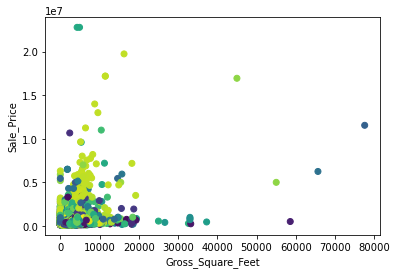

In [29]:
plt.scatter(NYC_df.Gross_Square_Feet, NYC_df.Sale_Price, c=NYC_df.enc_neighborhood)
plt.xlabel('Gross_Square_Feet')
plt.ylabel('Sale_Price')
plt.show()

In [30]:
X = NYC_df.drop(columns = ["Neighborhood", "Building Class Category", "Sale_Price", "Address", "Sale Date"])

In [31]:
X.shape

(37331, 7)

In [32]:
y = NYC_df.Sale_Price

In [33]:
X

Zip Code  Residential Units  Gross_Square_Feet  Year Built Sale_Date  \
0         10457                  1               2128        1920    200305   
1         10457                  1               2048        1901    200304   
2         10457                  1               1460        1899    200307   
3         10457                  1               1548        1899    200305   
4         10457                  1               1188        1901    200304   
...         ...                ...                ...         ...       ...   
37326     10012                  4              45000        1900    200307   
37327     10460                  5               9000        1930    200309   
37328     11374                 18              18445        2009    200312   
37329     10013                  4              19200        1915    200309   
37330     10001                  7              77556        1924    200310   

       enc_neighborhood  enc_Building Class Category  
0                     9                            0  
1                     9                            0  
2                     9                            0  
3                     9                            0  
4                     9                            0  
...                 ...                          ...  
37326               201                            6  
37327               173                            3  
37328               184                            1  
37329               218                            6  
37330                74                            6  

[37331 rows x 7 columns]

In [34]:
37331-(37331*.2)
x_train = X.iloc[0:29865]
x_test = X.iloc[29865:]
x_test

Zip Code  Residential Units  Gross_Square_Feet  Year Built Sale_Date  \
29865     10314                  2               1800        1970    200306   
29866     10314                  2               2404        1975    200307   
29867     10314                  2               2200        2003    200302   
29868     10314                  2               2088        1960    200309   
29869     10314                  2               1900        2001    200302   
...         ...                ...                ...         ...       ...   
37326     10012                  4              45000        1900    200307   
37327     10460                  5               9000        1930    200309   
37328     11374                 18              18445        2009    200312   
37329     10013                  4              19200        1915    200309   
37330     10001                  7              77556        1924    200310   

       enc_neighborhood  enc_Building Class Category  
29865                31                            1  
29866                31                            1  
29867                31                            1  
29868                31                            1  
29869                31                            1  
...                 ...                          ...  
37326               201                            6  
37327               173                            3  
37328               184                            1  
37329               218                            6  
37330                74                            6  

[7466 rows x 7 columns]

In [35]:
y_train = y.iloc[0:29865]
y_test = y.iloc[29865:]

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sts = StandardScaler()
x_scale = sts.fit(x_train)
x_train_scaled = x_scale.transform(x_train)
x_test_scaled = x_scale.transform(x_test)

In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test_scaled)
print(y_pred.shape)
model.score(x_test, y_test)

(7466,)


-55466726.03032917

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(X, y)

0.14450261006602105

In [44]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [45]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [46]:
clf.score(x_test,y_test)

0.27084027072197314

In [47]:
X = NYC_df[['Gross_Square_Feet', 'Sale_Date', 'enc_neighborhood',
               'enc_Building Class Category', 'Year Built']]
y = NYC_df['Sale_Price']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [52]:
# print the intercept
print(lin_reg.intercept_)

404563.30549924227


In [53]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Gross_Square_Feet            139419.667681
Sale_Date                     21494.443927
enc_neighborhood              10047.913700
enc_Building Class Category    4125.390464
Year Built                   -47058.711974

In [54]:
pred = lin_reg.predict(X_test)

In [55]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [56]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [57]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137514.3566889634
MSE: 114257539197.65993
RMSE: 338020.0278055428
R2 Square 0.23225847786073273
__________________________________
Train set evaluation:
_____________________________________
MAE: 140912.94302730274
MSE: 174979692052.9342
RMSE: 418305.7399234849
R2 Square 0.10641940334724542
__________________________________


In [58]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  137514.356689  1.142575e+11  338020.027806   0.232258   

   Cross Validation  
0         -0.099504

In [59]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 146479.9762655489
MSE: 146742027072.7437
RMSE: 383069.21968848363
R2 Square 0.013982376850129374
__________________________________
Train set evaluation:
_____________________________________
MAE: 151638.20915481707
MSE: 214368577938.26212
RMSE: 462999.54420956195
R2 Square -0.09473047717860927
__________________________________


In [60]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  137514.356689  1.142575e+11  338020.027806   0.232258   
1  Robust Regression  146479.976266  1.467420e+11  383069.219688   0.013982   

   Cross Validation  
0         -0.099504  
1         -0.137932

In [61]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137471.06808363803
MSE: 114308833535.9358
RMSE: 338095.8939944935
R2 Square 0.23191381094753316
__________________________________
Train set evaluation:
_____________________________________
MAE: 140871.7836196559
MSE: 174980109293.44467
RMSE: 418306.238649921
R2 Square 0.10641727259698575
__________________________________


In [62]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  137514.356689  1.142575e+11  338020.027806   0.232258   
1  Robust Regression  146479.976266  1.467420e+11  383069.219688   0.013982   
2   Ridge Regression  137471.068084  1.143088e+11  338095.893994   0.231914   

   Cross Validation  
0         -0.099504  
1         -0.137932  
2         -0.099504

In [63]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137564.948360815
MSE: 116216088268.21686
RMSE: 340904.8082210294
R2 Square 0.21909821329374823
__________________________________
Train set evaluation:
_____________________________________
MAE: 141277.1370964245
MSE: 176898483783.9879
RMSE: 420593.01442604576
R2 Square 0.09662058018227704
__________________________________


In [64]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  137514.356689  1.142575e+11  338020.027806   0.232258   
1  Robust Regression  146479.976266  1.467420e+11  383069.219688   0.013982   
2   Ridge Regression  137471.068084  1.143088e+11  338095.893994   0.231914   
3   Lasso Regression  137564.948361  1.162161e+11  340904.808221   0.219098   

   Cross Validation  
0         -0.099504  
1         -0.137932  
2         -0.099504  
3         -0.099502

In [65]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137403.19595535297
MSE: 114392283502.96759
RMSE: 338219.2831625181
R2 Square 0.2313530776675995
__________________________________
Train set evaluation:
_____________________________________
MAE: 140807.71378574453
MSE: 174982488523.85254
RMSE: 418309.0825261299
R2 Square 0.10640512242057099
__________________________________


In [66]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0       Linear Regression  137514.356689  1.142575e+11  338020.027806   
1       Robust Regression  146479.976266  1.467420e+11  383069.219688   
2        Ridge Regression  137471.068084  1.143088e+11  338095.893994   
3        Lasso Regression  137564.948361  1.162161e+11  340904.808221   
4  Elastic Net Regression  137403.195955  1.143923e+11  338219.283163   

   R2 Square  Cross Validation  
0   0.232258         -0.099504  
1   0.013982         -0.137932  
2   0.231914         -0.099504  
3   0.219098         -0.099502  
4   0.231353         -0.097334

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 144782.77719174552
MSE: 104730805523.52724
RMSE: 323621.3922526248
R2 Square 0.29627236318816896
__________________________________
Train set evaluation:
_____________________________________
MAE: 148746.49132367622
MSE: 163367469964.84546
RMSE: 404187.41935498867
R2 Square 0.16572032118632585
__________________________________


In [68]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0       Linear Regression  137514.356689  1.142575e+11  338020.027806   
1       Robust Regression  146479.976266  1.467420e+11  383069.219688   
2        Ridge Regression  137471.068084  1.143088e+11  338095.893994   
3        Lasso Regression  137564.948361  1.162161e+11  340904.808221   
4  Elastic Net Regression  137403.195955  1.143923e+11  338219.283163   
5   Polynomail Regression  144782.777192  1.047308e+11  323621.392253   

   R2 Square  Cross Validation  
0   0.232258         -0.099504  
1   0.013982         -0.137932  
2   0.231914         -0.099504  
3   0.219098         -0.099502  
4   0.231353         -0.097334  
5   0.296272          0.000000

In [69]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 137515.8747188483
MSE: 114256378343.61746
RMSE: 338018.31066322053
R2 Square 0.2322662780974245
__________________________________
Train set evaluation:
_____________________________________
MAE: 140914.5482059359
MSE: 174979692492.85394
RMSE: 418305.74044932006
R2 Square 0.10641940110067782
__________________________________


In [70]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression  137514.356689  1.142575e+11  338020.027806   
1            Robust Regression  146479.976266  1.467420e+11  383069.219688   
2             Ridge Regression  137471.068084  1.143088e+11  338095.893994   
3             Lasso Regression  137564.948361  1.162161e+11  340904.808221   
4       Elastic Net Regression  137403.195955  1.143923e+11  338219.283163   
5        Polynomail Regression  144782.777192  1.047308e+11  323621.392253   
6  Stochastic Gradient Descent  137515.874719  1.142564e+11  338018.310663   

   R2 Square  Cross Validation  
0   0.232258         -0.099504  
1   0.013982         -0.137932  
2   0.231914         -0.099504  
3   0.219098         -0.099502  
4   0.231353         -0.097334  
5   0.296272          0.000000  
6   0.232266          0.000000

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=10)

Epoch 1/10
26131/26131 [==============================] - 59s 2ms/step - loss: 358191235072.0000 - val_loss: 301798752256.0000
Epoch 2/10
26131/26131 [==============================] - 61s 2ms/step - loss: 310464217088.0000 - val_loss: 193998716928.0000
Epoch 3/10
26131/26131 [==============================] - 58s 2ms/step - loss: 204693012480.0000 - val_loss: 141570588672.0000
Epoch 4/10
26131/26131 [==============================] - 56s 2ms/step - loss: 193392164864.0000 - val_loss: 138092052480.0000
Epoch 5/10
26131/26131 [==============================] - 47s 2ms/step - loss: 190448877568.0000 - val_loss: 135597056000.0000
Epoch 6/10
26131/26131 [==============================] - 44s 2ms/step - loss: 188199567360.0000 - val_loss: 133860663296.0000
Epoch 7/10
26131/26131 [==============================] - 46s 2ms/step - loss: 186784858112.0000 - val_loss: 132655964160.0000
Epoch 8/10
26131/26131 [==============================] - 46s 2ms/step - loss: 185632604160.0000 - val_loss: 13

In [72]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [73]:
pd.DataFrame(r.history)

loss      val_loss
0  3.581912e+11  3.017988e+11
1  3.104642e+11  1.939987e+11
2  2.046930e+11  1.415706e+11
3  1.933922e+11  1.380921e+11
4  1.904489e+11  1.355971e+11
5  1.881996e+11  1.338607e+11
6  1.867849e+11  1.326560e+11
7  1.856326e+11  1.316094e+11
8  1.848097e+11  1.309233e+11
9  1.843184e+11  1.304001e+11

In [74]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [75]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 142711.80719168528
MSE: 130400190000.92728
RMSE: 361109.6647847123
R2 Square 0.12378963295043599
__________________________________
Train set evaluation:
_____________________________________
MAE: 145676.89363686807
MSE: 183963355824.04254
RMSE: 428909.4960758535
R2 Square 0.06054192157475358
__________________________________


In [76]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression  137514.356689  1.142575e+11  338020.027806   
1            Robust Regression  146479.976266  1.467420e+11  383069.219688   
2             Ridge Regression  137471.068084  1.143088e+11  338095.893994   
3             Lasso Regression  137564.948361  1.162161e+11  340904.808221   
4       Elastic Net Regression  137403.195955  1.143923e+11  338219.283163   
5        Polynomail Regression  144782.777192  1.047308e+11  323621.392253   
6  Stochastic Gradient Descent  137515.874719  1.142564e+11  338018.310663   
7     Artficial Neural Network  142711.807192  1.304002e+11  361109.664785   

   R2 Square  Cross Validation  
0   0.232258         -0.099504  
1   0.013982         -0.137932  
2   0.231914         -0.099504  
3   0.219098         -0.099502  
4   0.231353         -0.097334  
5   0.296272          0.000000  
6   0.232266          0.000000  
7   0.123790          0.000000

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 105561.25746299856
MSE: 93724713746.58838
RMSE: 306144.9227842728
R2 Square 0.3702266397546694
__________________________________
Train set evaluation:
_____________________________________
MAE: 40495.63523992353
MSE: 16075501638.968801
RMSE: 126789.20158660517
R2 Square 0.9179061514081502
__________________________________


In [78]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression  137514.356689  1.142575e+11  338020.027806   
1            Robust Regression  146479.976266  1.467420e+11  383069.219688   
2             Ridge Regression  137471.068084  1.143088e+11  338095.893994   
3             Lasso Regression  137564.948361  1.162161e+11  340904.808221   
4       Elastic Net Regression  137403.195955  1.143923e+11  338219.283163   
5        Polynomail Regression  144782.777192  1.047308e+11  323621.392253   
6  Stochastic Gradient Descent  137515.874719  1.142564e+11  338018.310663   
7     Artficial Neural Network  142711.807192  1.304002e+11  361109.664785   
8      Random Forest Regressor  105561.257463  9.372471e+10  306144.922784   

   R2 Square  Cross Validation  
0   0.232258         -0.099504  
1   0.013982         -0.137932  
2   0.231914         -0.099504  
3   0.219098         -0.099502  
4   0.231353         -0.097334  
5   0.296272          0.000000  
6   0.232266          0.000000  
7   0.123790          0.000000  
8   0.370227          0.000000

In [79]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 123336.24782525418
MSE: 123236044968.7555
RMSE: 351049.91805832327
R2 Square 0.17192835228965553
__________________________________
Train set evaluation:
_____________________________________
MAE: 122330.93186792776
MSE: 163820454770.0033
RMSE: 404747.39624857786
R2 Square 0.16340703312575988
__________________________________


In [80]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression  137514.356689  1.142575e+11  338020.027806   
1            Robust Regression  146479.976266  1.467420e+11  383069.219688   
2             Ridge Regression  137471.068084  1.143088e+11  338095.893994   
3             Lasso Regression  137564.948361  1.162161e+11  340904.808221   
4       Elastic Net Regression  137403.195955  1.143923e+11  338219.283163   
5        Polynomail Regression  144782.777192  1.047308e+11  323621.392253   
6  Stochastic Gradient Descent  137515.874719  1.142564e+11  338018.310663   
7     Artficial Neural Network  142711.807192  1.304002e+11  361109.664785   
8      Random Forest Regressor  105561.257463  9.372471e+10  306144.922784   
9                SVM Regressor  123336.247825  1.232360e+11  351049.918058   

   R2 Square  Cross Validation  
0   0.232258         -0.099504  
1   0.013982         -0.137932  
2   0.231914         -0.099504  
3   0.219098         -0.099502  
4   0.231353         -0.097334  
5   0.296272          0.000000  
6   0.232266          0.000000  
7   0.123790          0.000000  
8   0.370227          0.000000  
9   0.171928          0.000000

<AxesSubplot:ylabel='Model'>

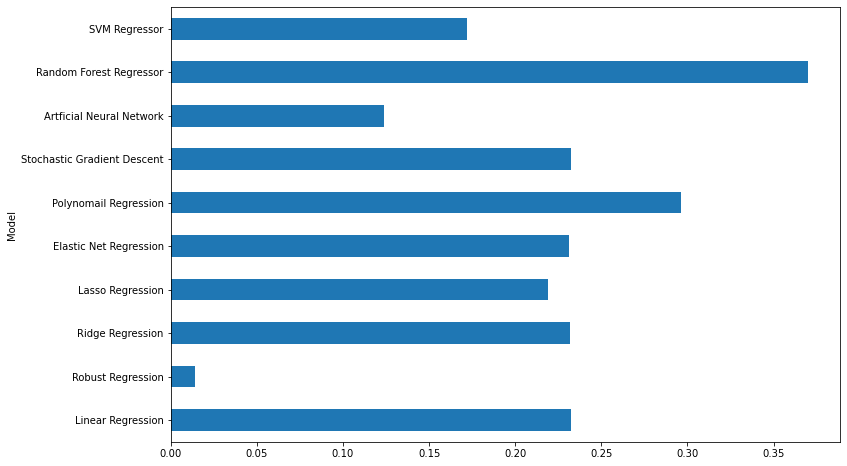

In [81]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))